In [2]:
! pip install pyedflib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# ! pip install mne

Defaulting to user installation because normal site-packages is not writeable


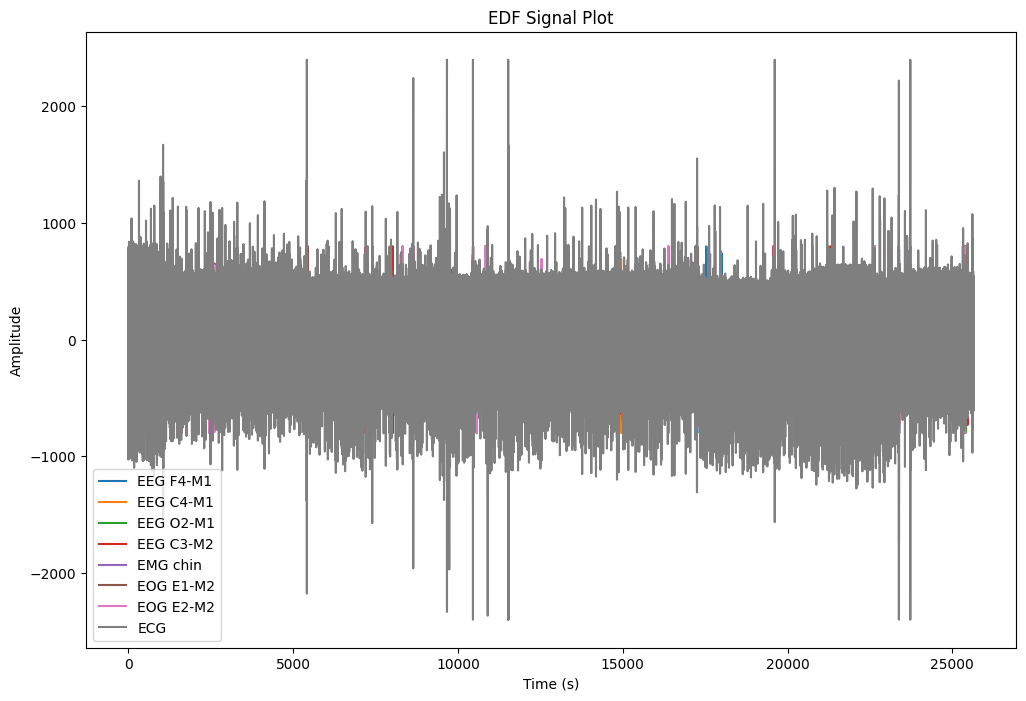

In [26]:
import pyedflib
import matplotlib.pyplot as plt
import numpy as np

# Load the EDF file
edf_file = pyedflib.EdfReader(r"D:\Clg\Project\SDP 2\dataset\16\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf")

# Get the number of signals (channels)
n = edf_file.signals_in_file

# Extract the signals
signals = []
for i in range(n):
    signals.append(edf_file.readSignal(i))

# Get the signal labels (optional, for better understanding of the plot)
labels = edf_file.getSignalLabels()

# Create time vector
# Assuming that all channels have the same sampling frequency
sampling_frequency = edf_file.getSampleFrequency(0)
duration = edf_file.getFileDuration()
time = np.linspace(0, duration, int(sampling_frequency * duration))

# Plot the signals
plt.figure(figsize=(12, 8))
for i in range(n):
    plt.plot(time, signals[i], label=labels[i])

# Labeling the plot
plt.title('EDF Signal Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Close the file when done
edf_file.close()

In [5]:
import pyedflib

# Load the EDF file
edf_file = pyedflib.EdfReader(r"D:\Clg\Project\SDP 2\dataset\16\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf")

# Get the number of signals (channels)
n_channels = edf_file.signals_in_file

# Get the labels of the channels
channel_labels = edf_file.getSignalLabels()

print(n_channels)
# Print out the channel labels and their corresponding index
print("Channel Index and Labels:")
for i, label in enumerate(channel_labels):
    print(f"Channel {i + 1}: {label}")

# Close the EDF file when done
edf_file.close()


8
Channel Index and Labels:
Channel 1: EEG F4-M1
Channel 2: EEG C4-M1
Channel 3: EEG O2-M1
Channel 4: EEG C3-M2
Channel 5: EMG chin
Channel 6: EOG E1-M2
Channel 7: EOG E2-M2
Channel 8: ECG


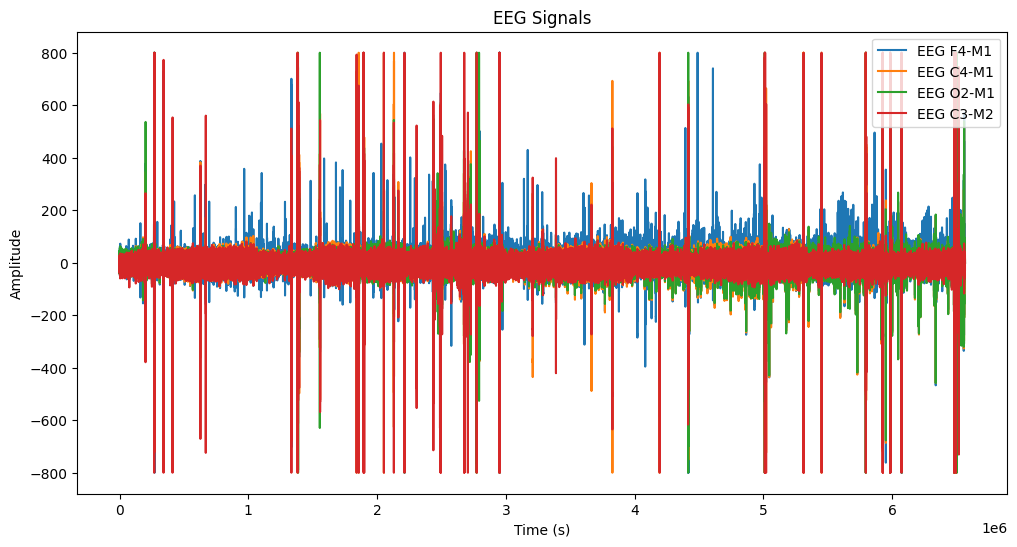

In [6]:
import pyedflib
import matplotlib.pyplot as plt

# Load the EDF file
edf_file = pyedflib.EdfReader(r"D:\Clg\Project\SDP 2\dataset\16\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf")

# Get channel labels
channel_labels = edf_file.getSignalLabels()

# List of EEG channels (you can adjust this based on the file's labeling)
eeg_channels = [label for label in channel_labels if 'EEG' in label]

# Create a figure to plot all EEG signals in one graph
plt.figure(figsize=(12, 6))

# Loop through the EEG channels and plot each signal
for i, channel_label in enumerate(eeg_channels):
    channel_index = channel_labels.index(channel_label)
    signal = edf_file.readSignal(channel_index)
    
    plt.plot(signal, label=f'{channel_label}')  # Plot each EEG signal

# Add title, labels, and legend
plt.title('EEG Signals')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')

# Show the plot
plt.show()

# Close the EDF file when done
edf_file.close()


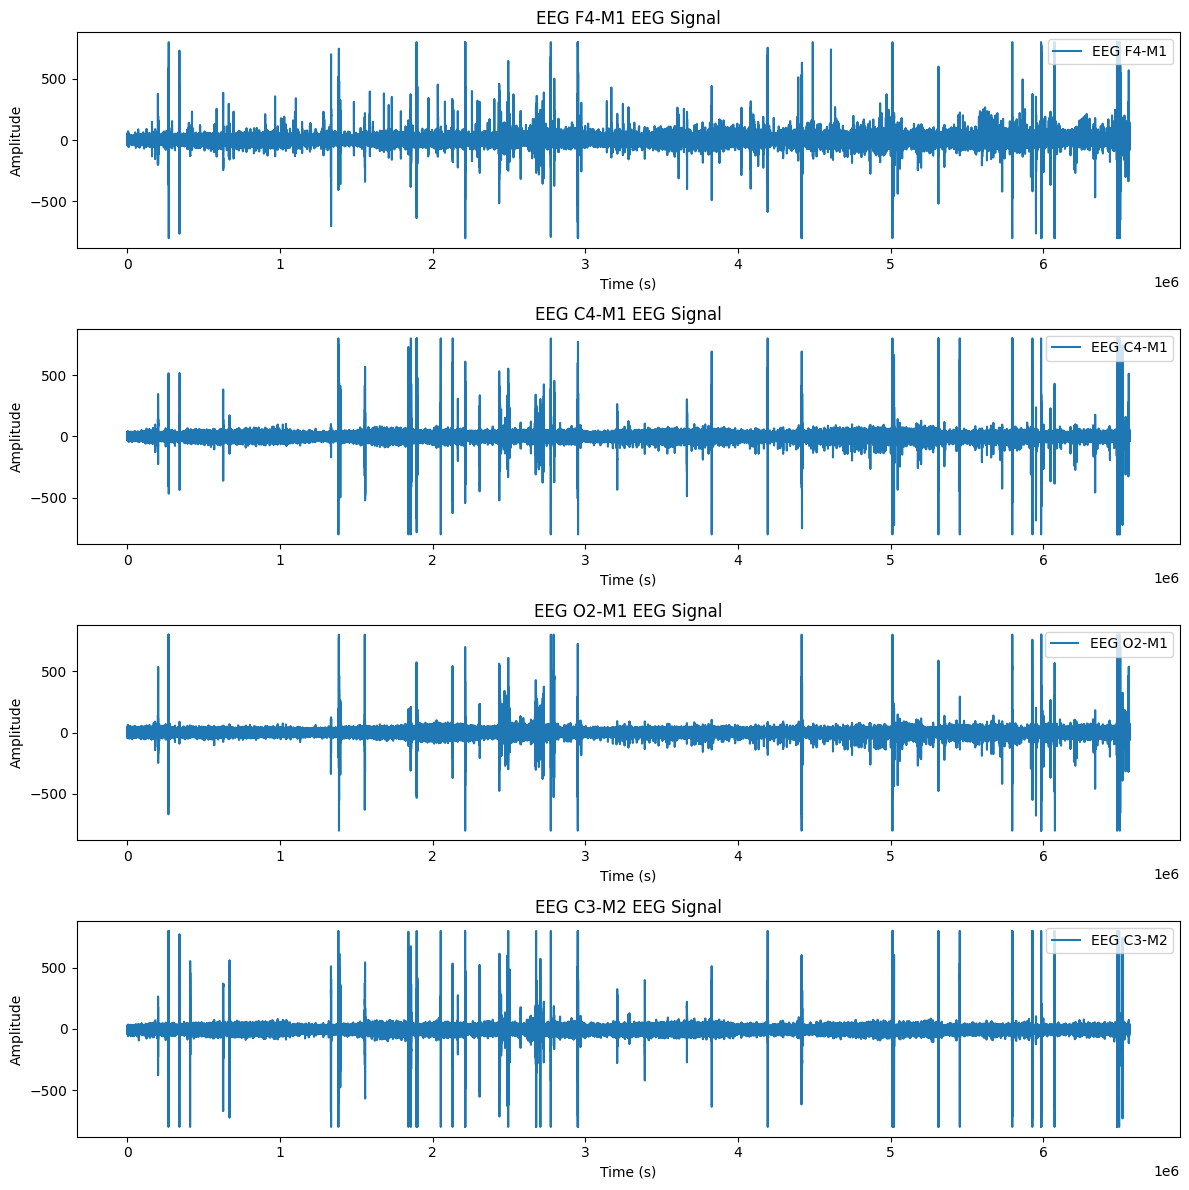

In [7]:
import pyedflib
import matplotlib.pyplot as plt

# Load the EDF file
edf_file = pyedflib.EdfReader(r"D:\Clg\Project\SDP 2\dataset\16\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf")

# Get channel labels
channel_labels = edf_file.getSignalLabels()

# Filter out only EEG channels (assuming 'EEG' appears in their labels)
eeg_channels = [label for label in channel_labels if 'EEG' in label]
num_eeg_channels = len(eeg_channels)

# Create a figure to plot each EEG channel in a separate subplot
plt.figure(figsize=(12, num_eeg_channels * 3))  # Adjust the figure size based on number of EEG channels

# Loop through each EEG channel and plot its signal
for i, channel_label in enumerate(eeg_channels):
    # Find the index of the EEG channel in the original channel labels
    channel_index = channel_labels.index(channel_label)
    
    # Read the EEG signal from the file
    signal = edf_file.readSignal(channel_index)
    
    # Plot each EEG signal in its own subplot
    plt.subplot(num_eeg_channels, 1, i + 1)
    plt.plot(signal, label=f'{channel_label}')
    plt.title(f'{channel_label} EEG Signal')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='upper right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Close the EDF file when done
edf_file.close()


Channel 'EEG C4-M1' found at index 1.


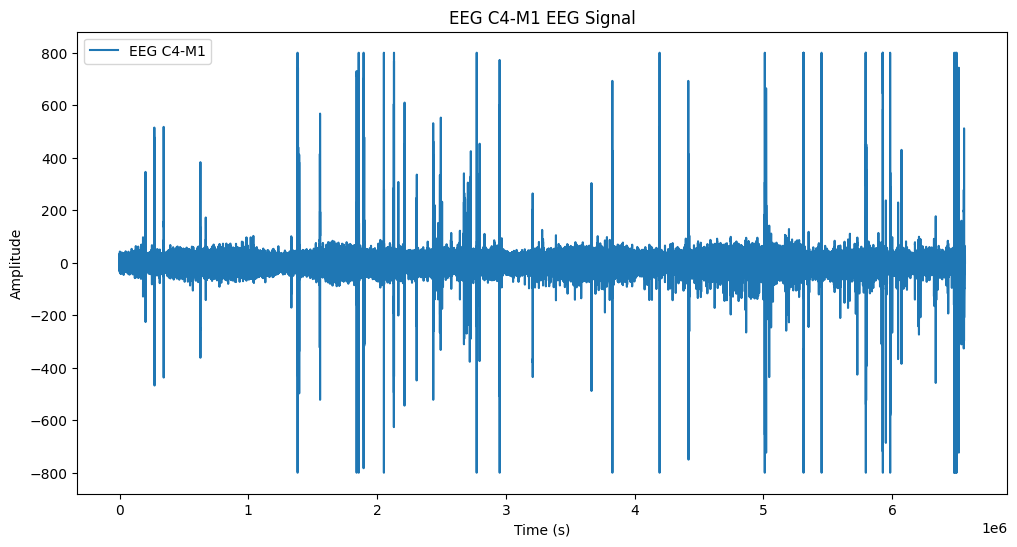

In [8]:
import pyedflib
import matplotlib.pyplot as plt

# Load the EDF file
edf_file = pyedflib.EdfReader(r"D:\Clg\Project\SDP 2\dataset\16\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf")

# Get channel labels
channel_labels = edf_file.getSignalLabels()

# Find the index of the 'EEG C4-M1' channel
target_channel_label = 'EEG C4-M1'
if target_channel_label in channel_labels:
    channel_index = channel_labels.index(target_channel_label)
    print(f"Channel '{target_channel_label}' found at index {channel_index}.")
else:
    raise ValueError(f"Channel '{target_channel_label}' not found in EDF file.")

# Extract and plot EEG signal for the identified channel
signal = edf_file.readSignal(channel_index)

# Plot the EEG signal
plt.figure(figsize=(12, 6))
plt.plot(signal, label=f'{target_channel_label}')
plt.title(f'{target_channel_label} EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Close the EDF file when done
edf_file.close()


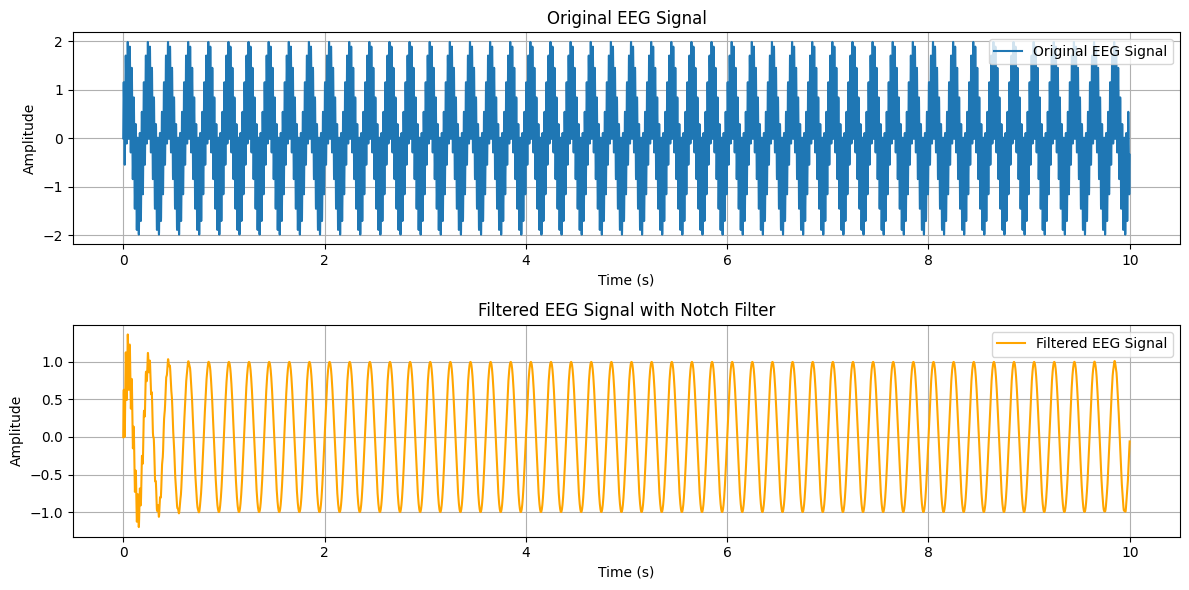

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 5 * t)  # Example signal with a 50 Hz component

# Define the notch filter parameters
notch_freq = 50  # Frequency to notch out (in Hz)
quality_factor = 30  # Quality factor; higher values mean a narrower notch

# Design the Butterworth notch filter
b, a = iirnotch(notch_freq / (0.5 * fs), quality_factor)

# Apply the notch filter to the EEG signal
filtered_signal = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered EEG Signal', color='orange')
plt.title('Filtered EEG Signal with Notch Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


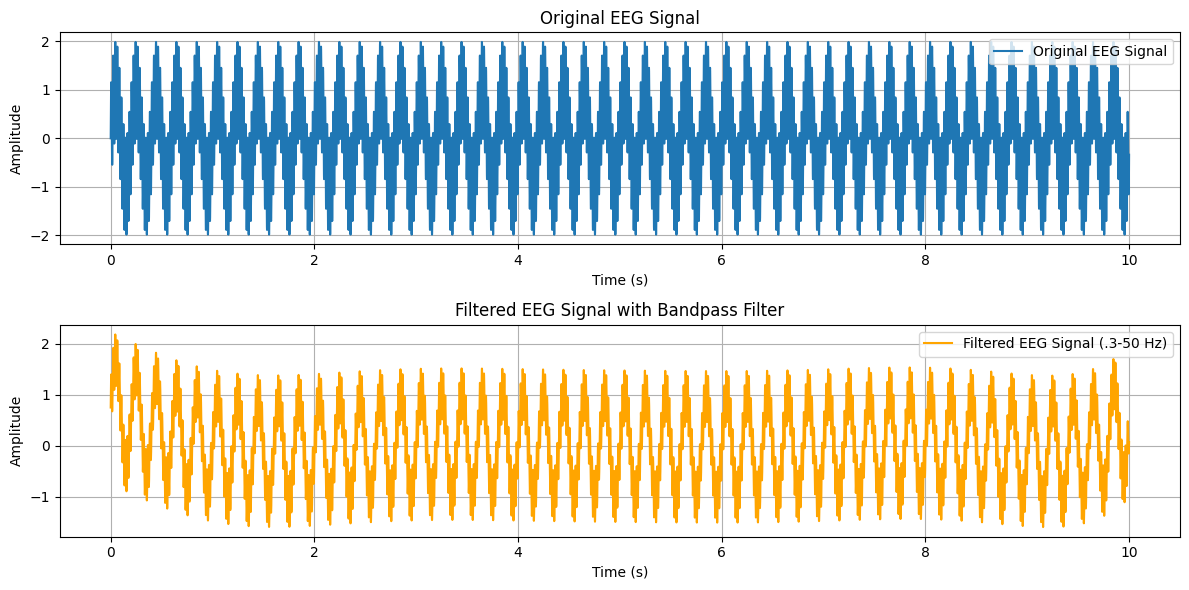

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)  # Example signal with 5 Hz and 50 Hz components

# Define the band-pass filter parameters
low_cutoff = 0.3    # Lower bound of frequency band (e.g., Theta band lower bound) in Hz
high_cutoff = 50  # Upper bound of frequency band (e.g., Beta band upper bound) in Hz
order = 4         # Filter order

# Design the Butterworth band-pass filter
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal, label='Filtered EEG Signal (.3-50 Hz)', color='orange')
plt.title('Filtered EEG Signal with Bandpass Filter')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


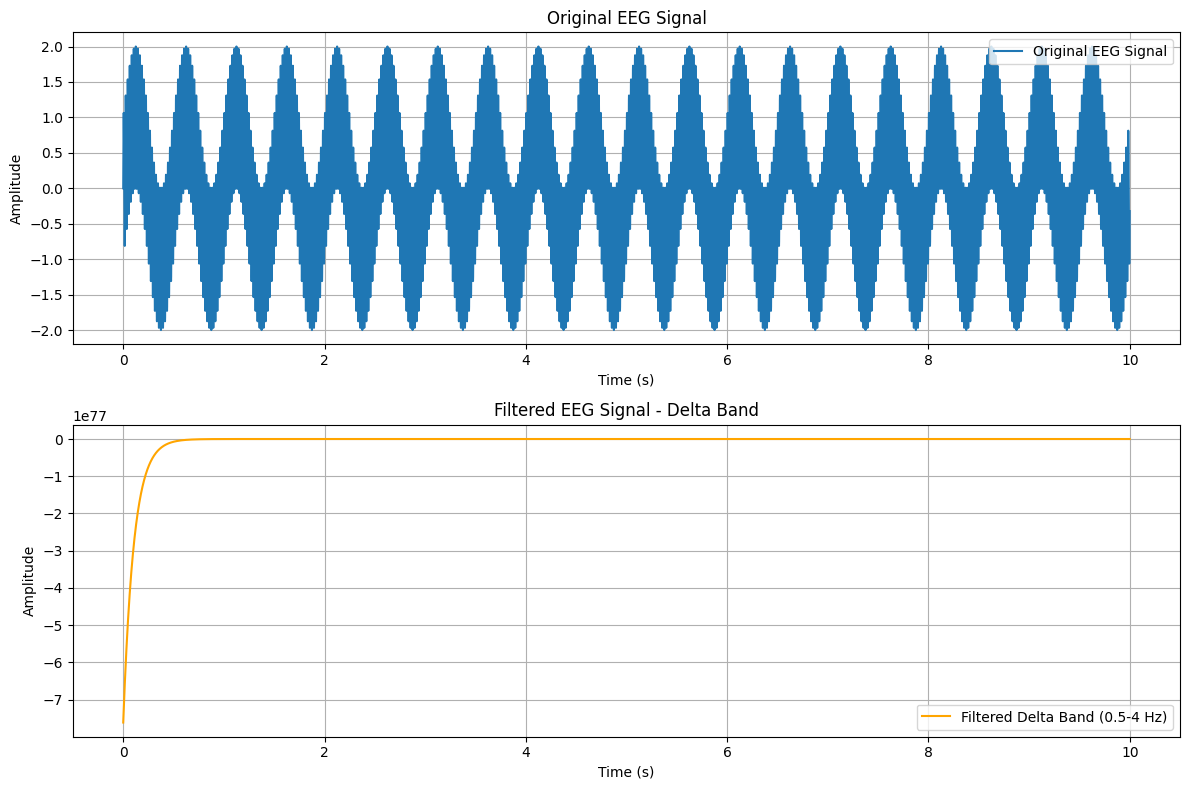

In [27]:

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 2 * t) + np.sin(2 * np.pi * 50 * t)  # Example signal with Delta and high-frequency components

# Define the band-pass filter parameters for the Delta band (0.5-4 Hz)
low_cutoff = 0.3  # Lower bound of Delta band (in Hz)
high_cutoff = 4   # Upper bound of Delta band (in Hz)
order = 4         # Filter order

# Design the Butterworth band-pass filter for the Delta band
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal_D = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

# Plot the original EEG signal
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the filtered Delta band signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal_D, label='Filtered Delta Band (0.5-4 Hz)', color='orange')
plt.title('Filtered EEG Signal - Delta Band')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

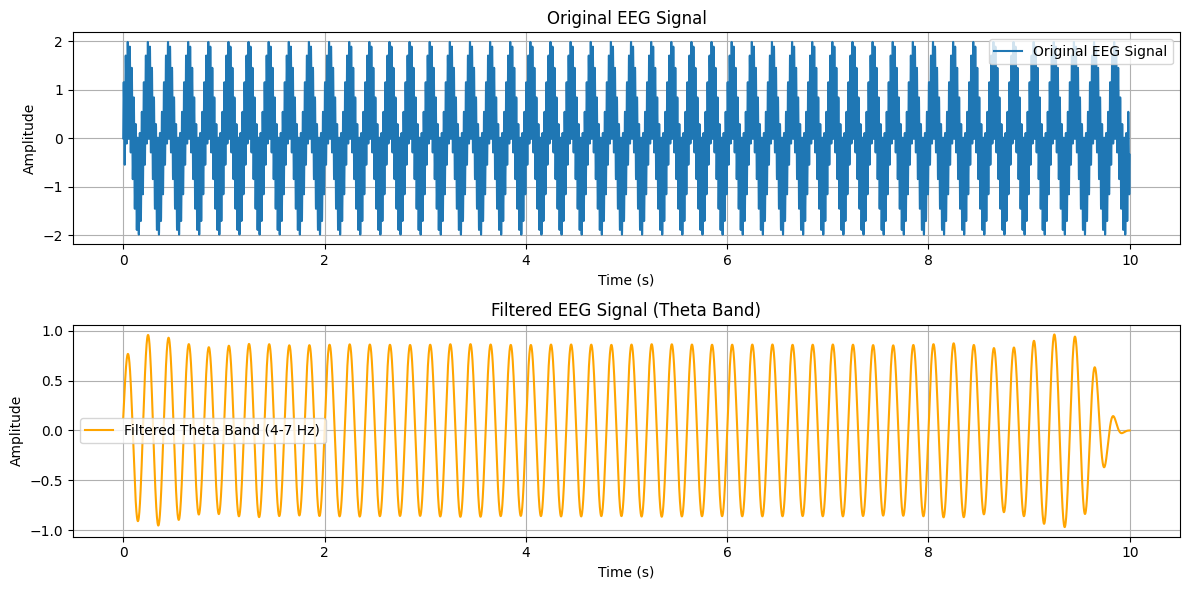

In [12]:

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)  # Example signal with 50 Hz component

# Define the band-pass filter parameters for the Theta band
low_cutoff = 4   # Lower bound of Theta band (in Hz)
high_cutoff = 7  # Upper bound of Theta band (in Hz)
order = 4        # Filter order

# Design the Butterworth band-pass filter
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal_T = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal_T, label='Filtered Theta Band (4-7 Hz)', color='orange')
plt.title('Filtered EEG Signal (Theta Band)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



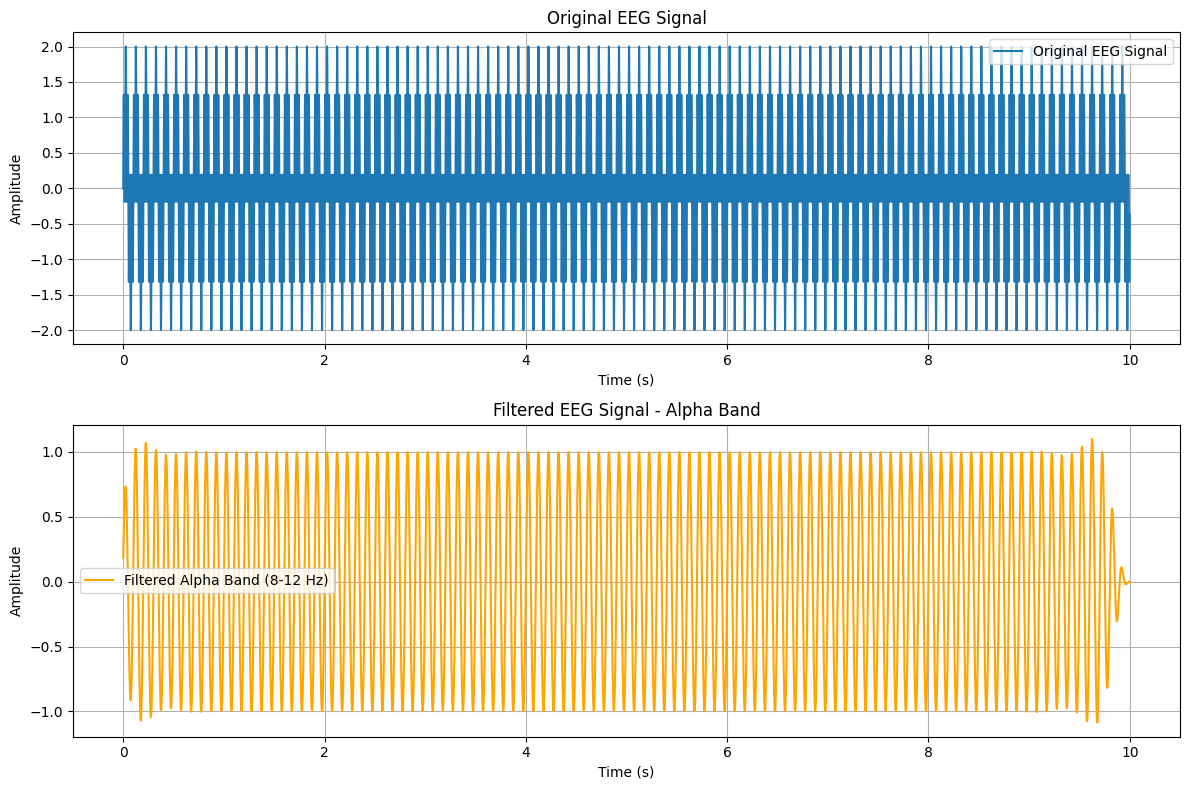

In [13]:

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 50 * t)  # Example signal with Alpha and high-frequency components

# Define the band-pass filter parameters for the Alpha band (8-12 Hz)
low_cutoff = 8    # Lower bound of Alpha band (in Hz)
high_cutoff = 13  # Upper bound of Alpha band (in Hz)
order = 4         # Filter order

# Design the Butterworth band-pass filter for the Alpha band
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal_A = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

# Plot the original EEG signal
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the filtered Alpha band signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal_A, label='Filtered Alpha Band (8-12 Hz)', color='orange')
plt.title('Filtered EEG Signal - Alpha Band')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


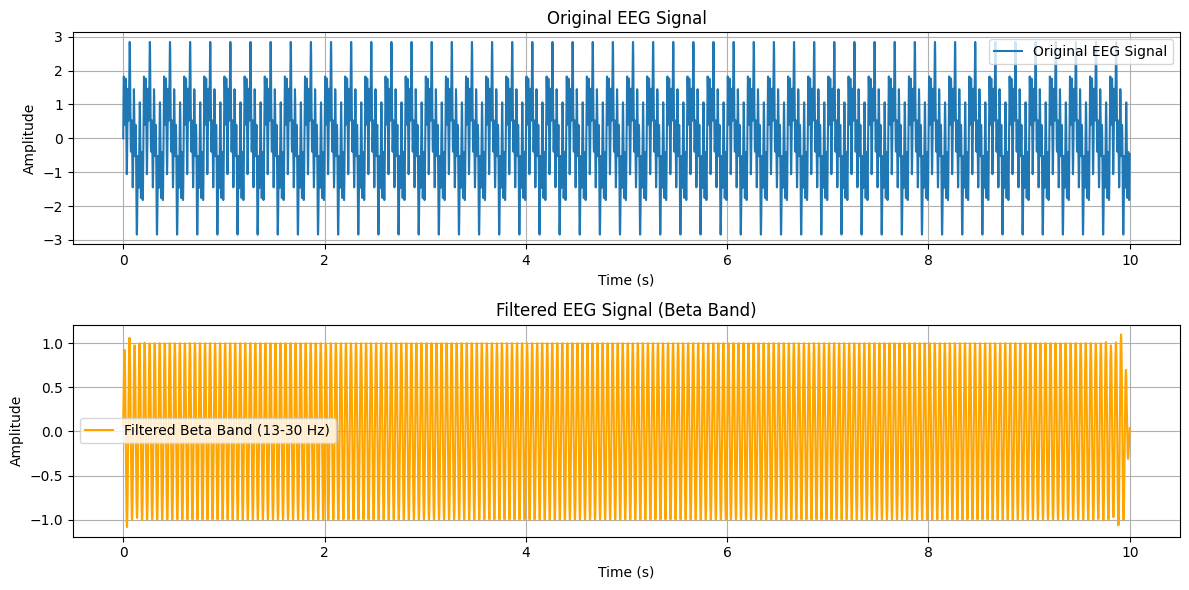

In [14]:

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 20 * t) + np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)  # Example EEG signal with multiple components

# Define the band-pass filter parameters for the Beta band
low_cutoff = 13  # Lower bound of Beta band (in Hz)
high_cutoff = 30  # Upper bound of Beta band (in Hz)
order = 4        # Filter order

# Design the Butterworth band-pass filter
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal_B = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal_B, label='Filtered Beta Band (13-30 Hz)', color='orange')
plt.title('Filtered EEG Signal (Beta Band)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

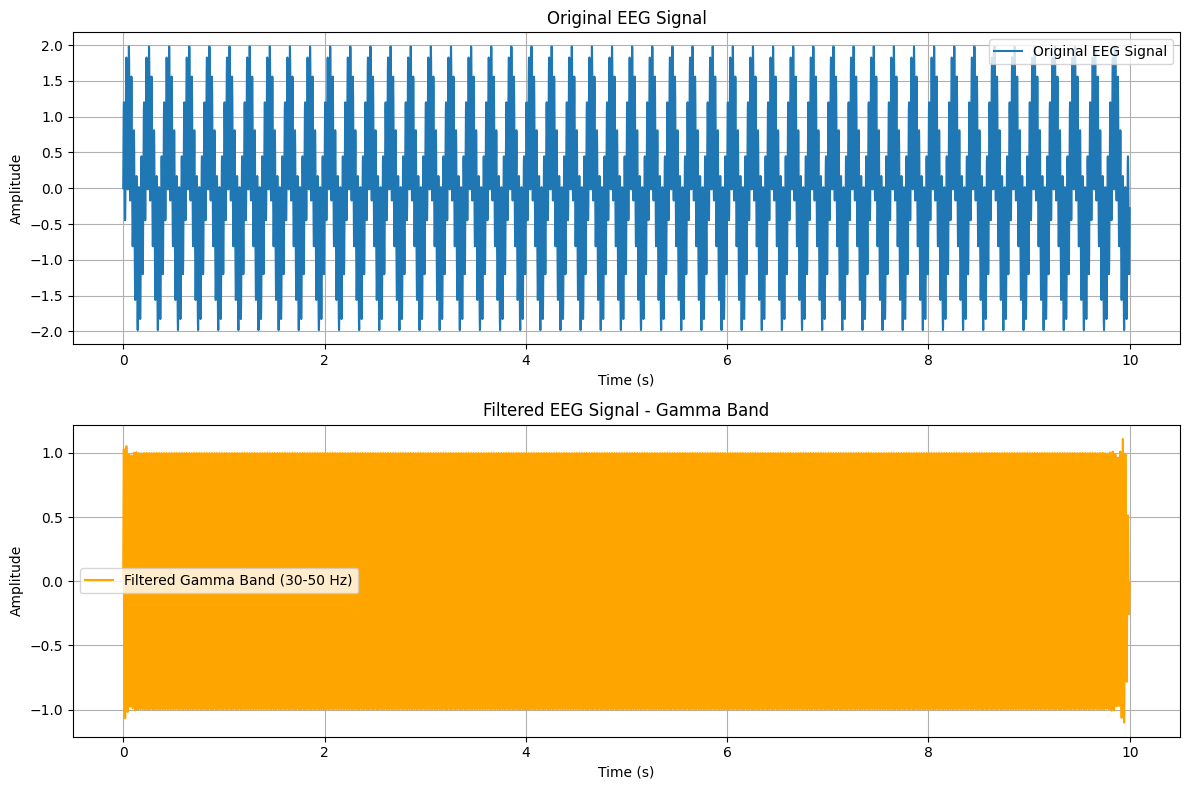

In [15]:

# Load your EEG signal and sampling frequency
fs = 1000  # Sampling frequency in Hz
duration = 10  # Duration in seconds
t = np.linspace(0, duration, int(fs * duration), endpoint=False)
eeg_signal = np.sin(2 * np.pi * 40 * t) + np.sin(2 * np.pi * 5 * t)  # Example signal with Gamma and low-frequency components

# Define the band-pass filter parameters for the Gamma band (30-50 Hz)
low_cutoff = 30   # Lower bound of Gamma band (in Hz)
high_cutoff = 50  # Upper bound of Gamma band (in Hz)
order = 4         # Filter order

# Design the Butterworth band-pass filter for the Gamma band
b, a = butter(order, [low_cutoff / (0.5 * fs), high_cutoff / (0.5 * fs)], btype='band')

# Apply the band-pass filter to the EEG signal
filtered_signal_G = filtfilt(b, a, eeg_signal)

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

# Plot the original EEG signal
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, label='Original EEG Signal')
plt.title('Original EEG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

# Plot the filtered Gamma band signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal_G, label='Filtered Gamma Band (30-50 Hz)', color='orange')
plt.title('Filtered EEG Signal - Gamma Band')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
! pip install PyWavelets


# ! pip install pywt

Defaulting to user installation because normal site-packages is not writeable


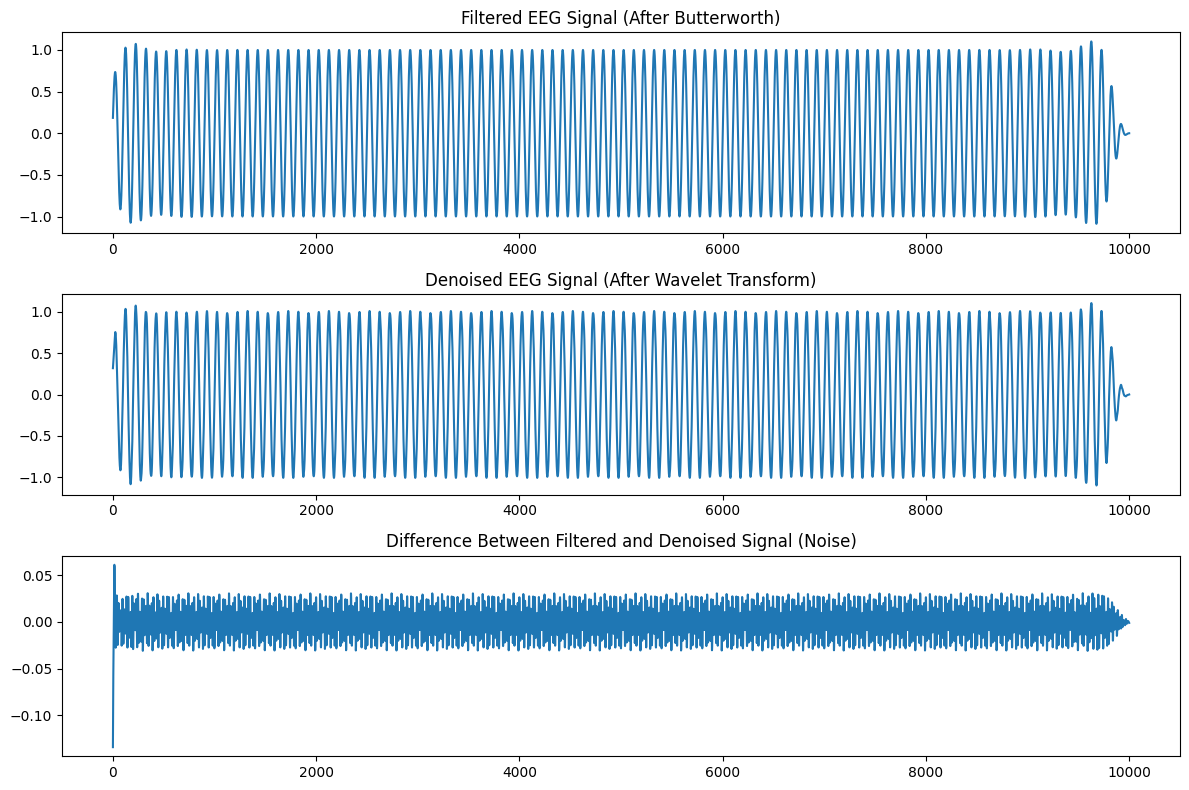

In [17]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

# Assuming `filtered_signal` is the EEG signal after Butterworth filtering
# You can replace 'filtered_signal' with the signal from your Butterworth filter

# Wavelet Transform Denoising Parameters
wavelet = 'db4'  # Daubechies wavelet, commonly used for EEG denoising
level = 4  # Level of decomposition, adjust based on your needs

# Perform discrete wavelet transform (DWT)
coeffs = pywt.wavedec(filtered_signal_A, wavelet, level=level)

# Apply thresholding to the detail coefficients (ignore the approximation coefficients)
threshold = np.sqrt(2 * np.log(len(filtered_signal_A)))  # Universal threshold, can be adjusted
coeffs[1:] = [pywt.threshold(i, threshold, mode='soft') for i in coeffs[1:]]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plot the original, filtered, and denoised signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(filtered_signal_A)
plt.title("Filtered EEG Signal (After Butterworth)")

plt.subplot(3, 1, 2)
plt.plot(denoised_signal)
plt.title("Denoised EEG Signal (After Wavelet Transform)")

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_A - denoised_signal)
plt.title("Difference Between Filtered and Denoised Signal (Noise)")

plt.tight_layout()
plt.show()


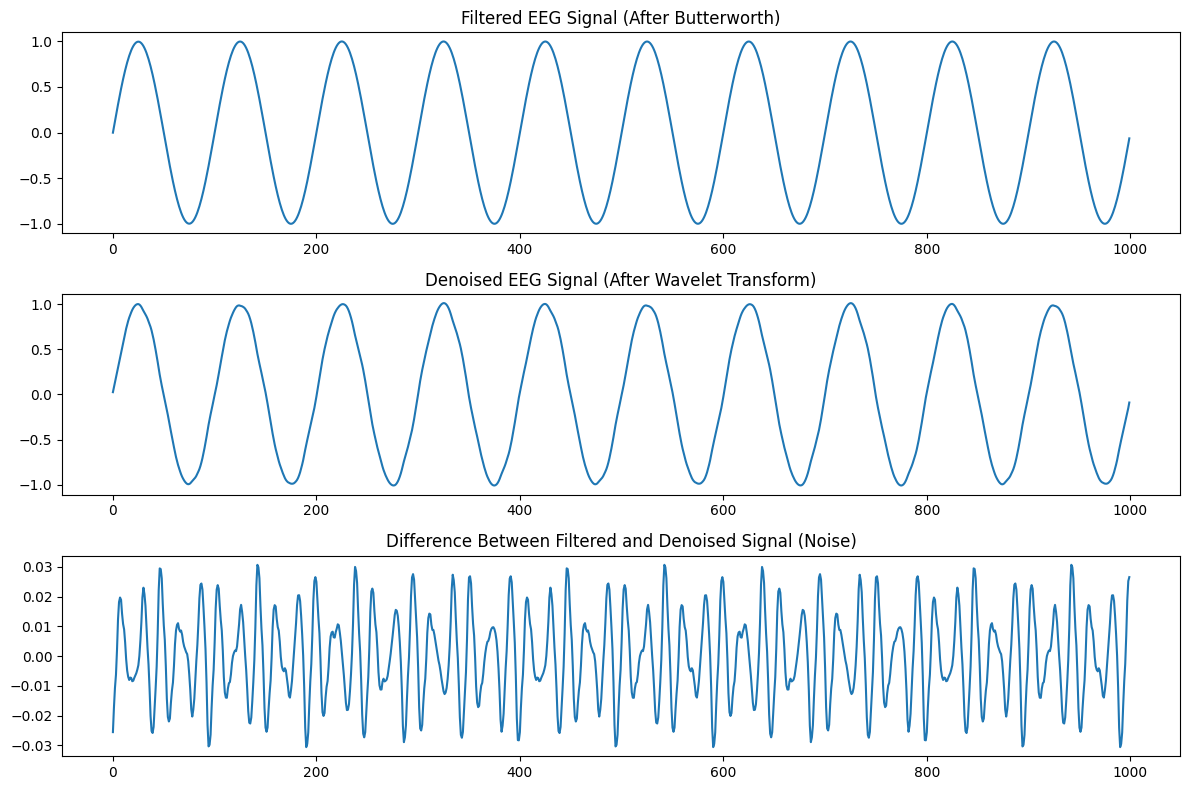

In [18]:
# Define a segment to zoom in on
start = 1000
end = 2000

# Wavelet Transform Denoising Parameters
wavelet = 'db4'  # Daubechies wavelet, commonly used for EEG denoising
level = 4  # Level of decomposition, adjust based on your needs

# Perform discrete wavelet transform (DWT)
coeffs = pywt.wavedec(filtered_signal_A, wavelet, level=level)

# Apply thresholding to the detail coefficients (ignore the approximation coefficients)
threshold = np.sqrt(2 * np.log(len(filtered_signal_A)))  # Universal threshold, can be adjusted
coeffs[1:] = [pywt.threshold(i, threshold, mode='soft') for i in coeffs[1:]]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plot the original, filtered, and denoised signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(filtered_signal_A[start:end])
plt.title("Filtered EEG Signal (After Butterworth)")

plt.subplot(3, 1, 2)
plt.plot(denoised_signal[start:end])
plt.title("Denoised EEG Signal (After Wavelet Transform)")

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_A[start:end] - denoised_signal[start:end])
plt.title("Difference Between Filtered and Denoised Signal (Noise)")

plt.tight_layout()
plt.show()

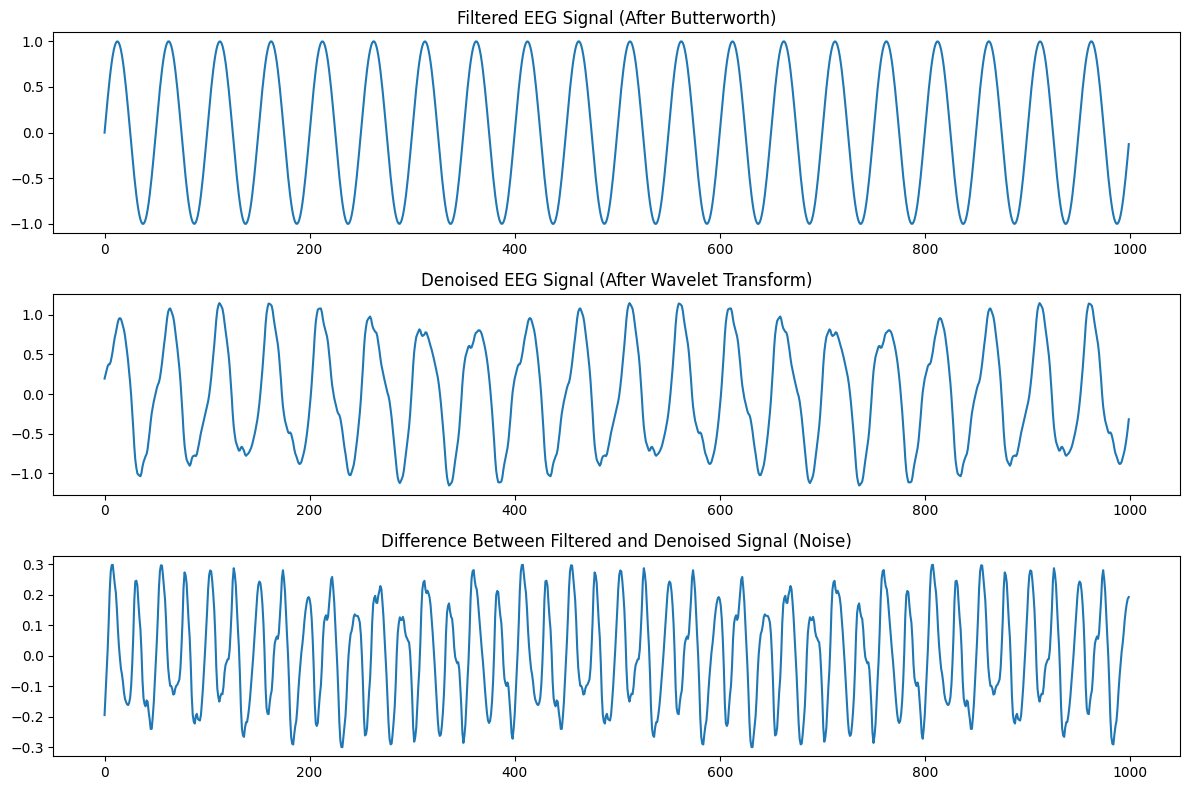

In [19]:
# Define a segment to zoom in on
start = 1000
end = 2000

# Perform discrete wavelet transform (DWT)
coeffs = pywt.wavedec(filtered_signal_B, wavelet, level=level)

# Define a function to calculate the SURE threshold for each level
def sure_threshold(detail_coeffs):
    """Compute SURE threshold for detail coefficients."""
    # The standard deviation estimate for the noise
    sigma = np.median(np.abs(detail_coeffs)) / 0.6745
    # Universal threshold
    threshold = sigma * np.sqrt(2 * np.log(len(detail_coeffs)))
    return threshold

# Apply SURE thresholding to the detail coefficients (ignoring approximation)
coeffs[1:] = [pywt.threshold(i, sure_threshold(i), mode='soft') for i in coeffs[1:]]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plot the original, filtered, and denoised signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(filtered_signal_B[start:end])
plt.title("Filtered EEG Signal (After Butterworth)")

plt.subplot(3, 1, 2)
plt.plot(denoised_signal[start:end])
plt.title("Denoised EEG Signal (After Wavelet Transform)")

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_B[start:end] - denoised_signal[start:end])
plt.title("Difference Between Filtered and Denoised Signal (Noise)")

plt.tight_layout()
plt.show()

# # Try different wavelets
# wavelet = 'sym4'  # Symlet wavelet

# # Perform discrete wavelet transform (DWT)
# coeffs = pywt.wavedec(filtered_signal_B, wavelet, level=level)

# # Modify thresholding: SURE or custom threshold
# threshold = pywt.threshold(coeffs, method='sure')  # SURE thresholding

# # Apply thresholding to the detail coefficients
# coeffs[1:] = [pywt.threshold(i, threshold, mode='hard') for i in coeffs[1:]]

# # Reconstruct the signal
# denoised_signal = pywt.waverec(coeffs, wavelet)


# # Plot the original, filtered, and denoised signals
# plt.figure(figsize=(12, 8))

# plt.subplot(3, 1, 1)
# plt.plot(filtered_signal_B[start:end])
# plt.title("Filtered EEG Signal (After Butterworth)")

# plt.subplot(3, 1, 2)
# plt.plot(denoised_signal[start:end])
# plt.title("Denoised EEG Signal (After Wavelet Transform)")

# plt.subplot(3, 1, 3)
# plt.plot(filtered_signal_B[start:end] - denoised_signal[start:end])
# plt.title("Difference Between Filtered and Denoised Signal (Noise)")

# plt.tight_layout()
# plt.show()

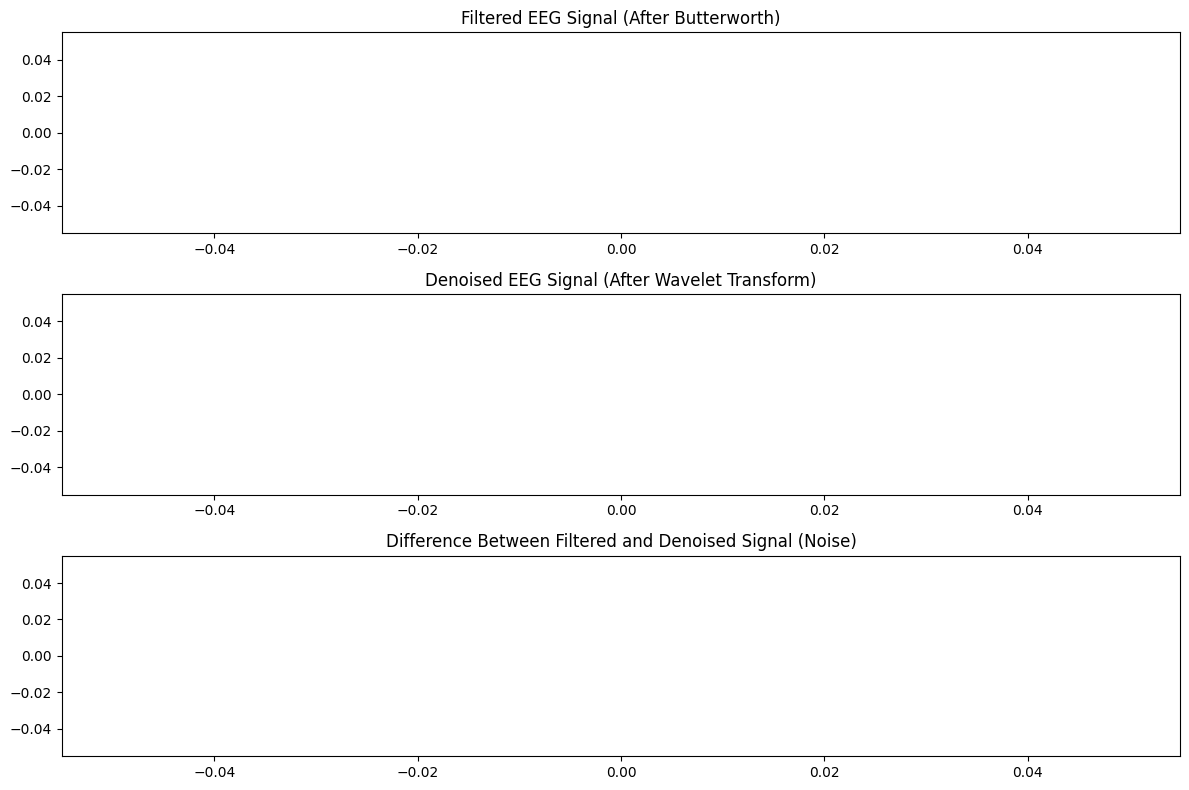

In [20]:
# Define a segment to zoom in on
start = 1000
end = 2000

# Wavelet Transform Denoising Parameters
wavelet = 'db4'  # Daubechies wavelet, commonly used for EEG denoising
level = 4  # Level of decomposition, adjust based on your needs

# Perform discrete wavelet transform (DWT)
coeffs = pywt.wavedec(filtered_signal_D, wavelet, level=level)

# Apply thresholding to the detail coefficients (ignore the approximation coefficients)
threshold = np.sqrt(2 * np.log(len(filtered_signal_D)))  # Universal threshold, can be adjusted
coeffs[1:] = [pywt.threshold(i, threshold, mode='soft') for i in coeffs[1:]]

# Reconstruct the signal from the thresholded coefficients
denoised_signal = pywt.waverec(coeffs, wavelet)

# Plot the original, filtered, and denoised signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(filtered_signal_D[start:end])
plt.title("Filtered EEG Signal (After Butterworth)")

plt.subplot(3, 1, 2)
plt.plot(denoised_signal[start:end])
plt.title("Denoised EEG Signal (After Wavelet Transform)")

plt.subplot(3, 1, 3)
plt.plot(filtered_signal_D[start:end] - denoised_signal[start:end])
plt.title("Difference Between Filtered and Denoised Signal (Noise)")

plt.tight_layout()
plt.show()

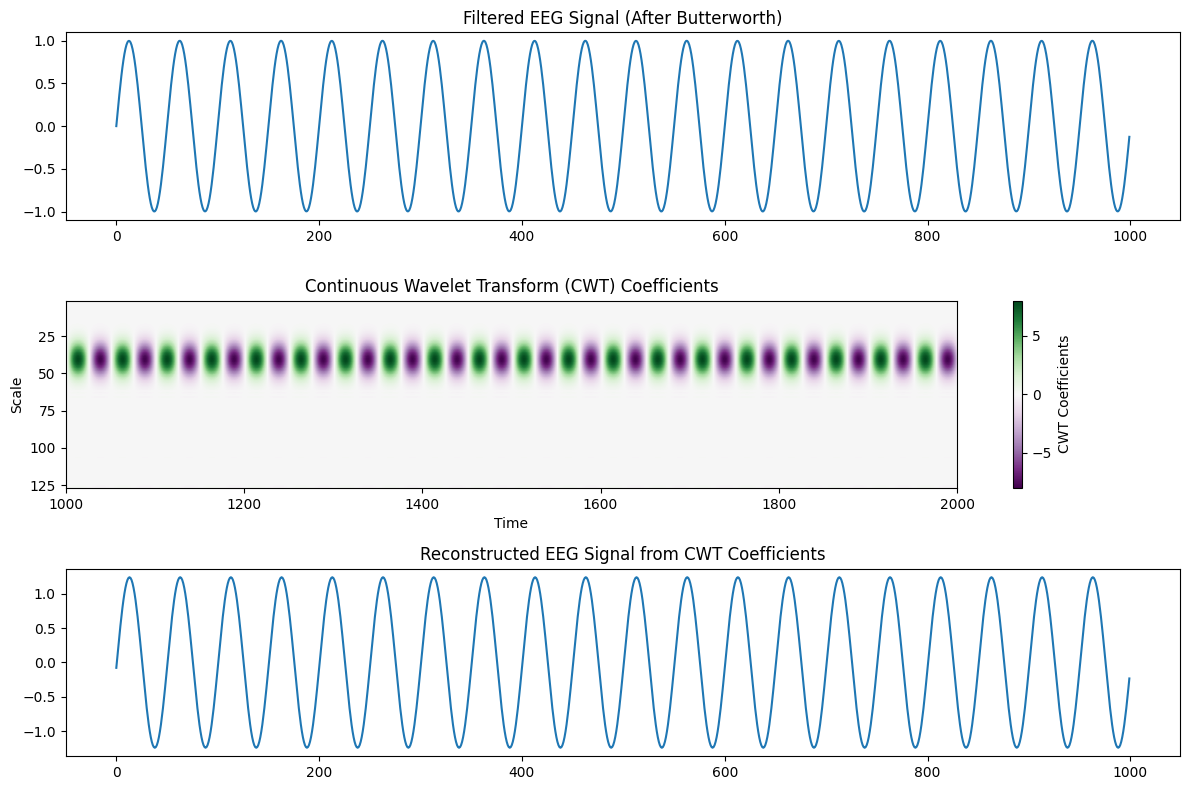

In [21]:
# import numpy as np
# import pywt
# import matplotlib.pyplot as plt

# Define the segment to zoom in on
start = 1000
end = 2000

# Define the scales for Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)  # Adjust based on your signal

# Use Morlet wavelet ('morl') for CWT
wavelet = 'morl'

# Perform Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(filtered_signal_B, scales, wavelet)

# Reconstruct the signal by inverse CWT (taking max coefficients for demonstration)
# Note: CWT does not have a straightforward inverse like DWT, this is just for comparison
reconstructed_signal = np.mean(coefficients, axis=0)

# Plotting the original and CWT-transformed signals
plt.figure(figsize=(12, 8))

# Plot the original filtered signal (after Butterworth)
plt.subplot(3, 1, 1)
plt.plot(filtered_signal_B[start:end])
plt.title("Filtered EEG Signal (After Butterworth)")

# Plot the CWT coefficients (as a heatmap)
plt.subplot(3, 1, 2)
plt.imshow(coefficients[:, start:end], extent=[start, end, scales[-1], scales[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.colorbar(label="CWT Coefficients")
plt.title("Continuous Wavelet Transform (CWT) Coefficients")
plt.ylabel('Scale')
plt.xlabel('Time')

# Plot the 'reconstructed' signal using the mean of CWT coefficients
plt.subplot(3, 1, 3)
plt.plot(reconstructed_signal[start:end])
plt.title("Reconstructed EEG Signal from CWT Coefficients")

plt.tight_layout()
plt.show()


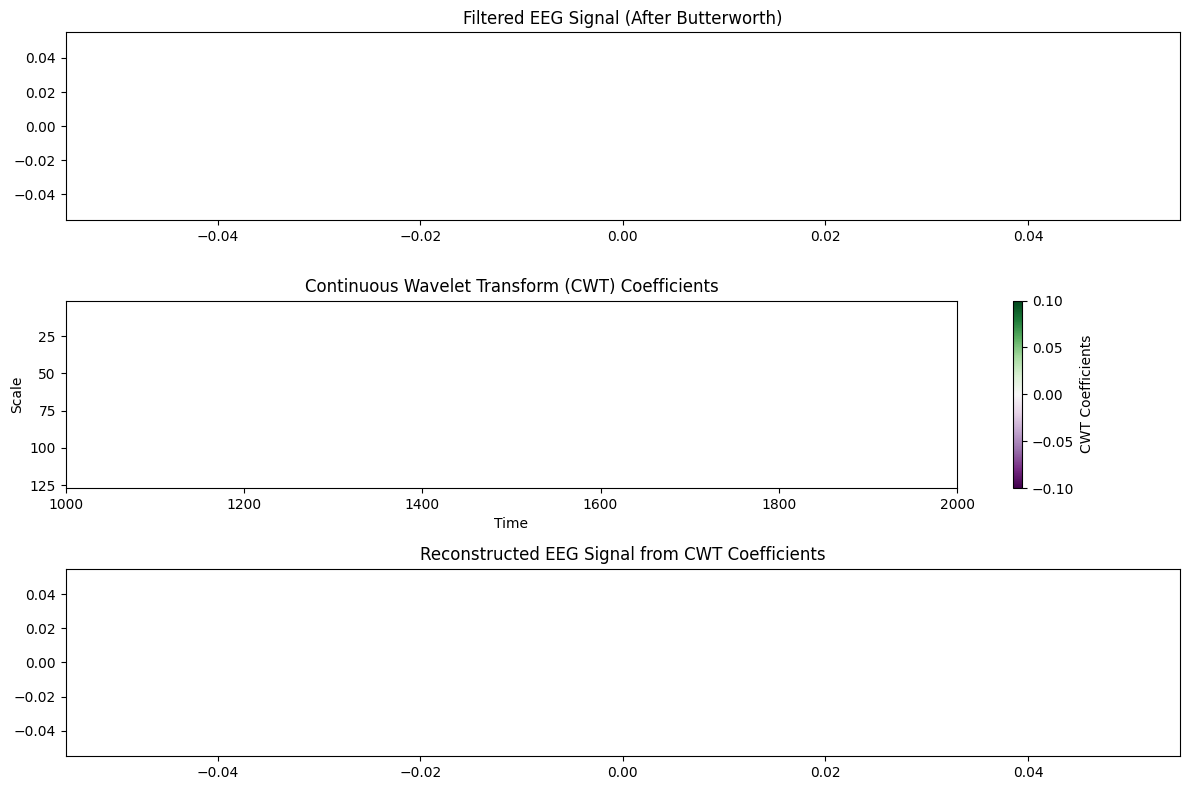

In [22]:
# Define the segment to zoom in on
start = 1000
end = 2000

# Define the scales for Continuous Wavelet Transform (CWT)
scales = np.arange(1, 128)  # Adjust based on your signal

# Use Morlet wavelet ('morl') for CWT
wavelet = 'morl'

# Perform Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(filtered_signal_D, scales, wavelet)

# Reconstruct the signal by inverse CWT (taking max coefficients for demonstration)
# Note: CWT does not have a straightforward inverse like DWT, this is just for comparison
reconstructed_signal = np.mean(coefficients, axis=0)

# Plotting the original and CWT-transformed signals
plt.figure(figsize=(12, 8))

# Plot the original filtered signal (after Butterworth)
plt.subplot(3, 1, 1)
plt.plot(filtered_signal_D[start:end])
plt.title("Filtered EEG Signal (After Butterworth)")

# Plot the CWT coefficients (as a heatmap)
plt.subplot(3, 1, 2)
plt.imshow(coefficients[:, start:end], extent=[start, end, scales[-1], scales[0]], cmap='PRGn', aspect='auto',
           vmax=abs(coefficients).max(), vmin=-abs(coefficients).max())
plt.colorbar(label="CWT Coefficients")
plt.title("Continuous Wavelet Transform (CWT) Coefficients")
plt.ylabel('Scale')
plt.xlabel('Time')

# Plot the 'reconstructed' signal using the mean of CWT coefficients
plt.subplot(3, 1, 3)
plt.plot(reconstructed_signal[start:end])
plt.title("Reconstructed EEG Signal from CWT Coefficients")

plt.tight_layout()
plt.show()
